In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 导入字体times new roman
plt.rcParams['font.sans-serif'] = ['Times New Roman']


In [2]:
data = pd.read_csv('data/train.csv')


In [4]:
data.columns

Index(['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price',
       'ask_size', 'wap', 'target', 'time_id', 'row_id'],
      dtype='object')

C:\Users\zhiwei\AppData\Local\Temp\ipykernel_19148\1729184760.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True, ax=ax)
c:\Users\zhiwei\anaconda3\envs\gbm\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\zhiwei\anaconda3\envs\gbm\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

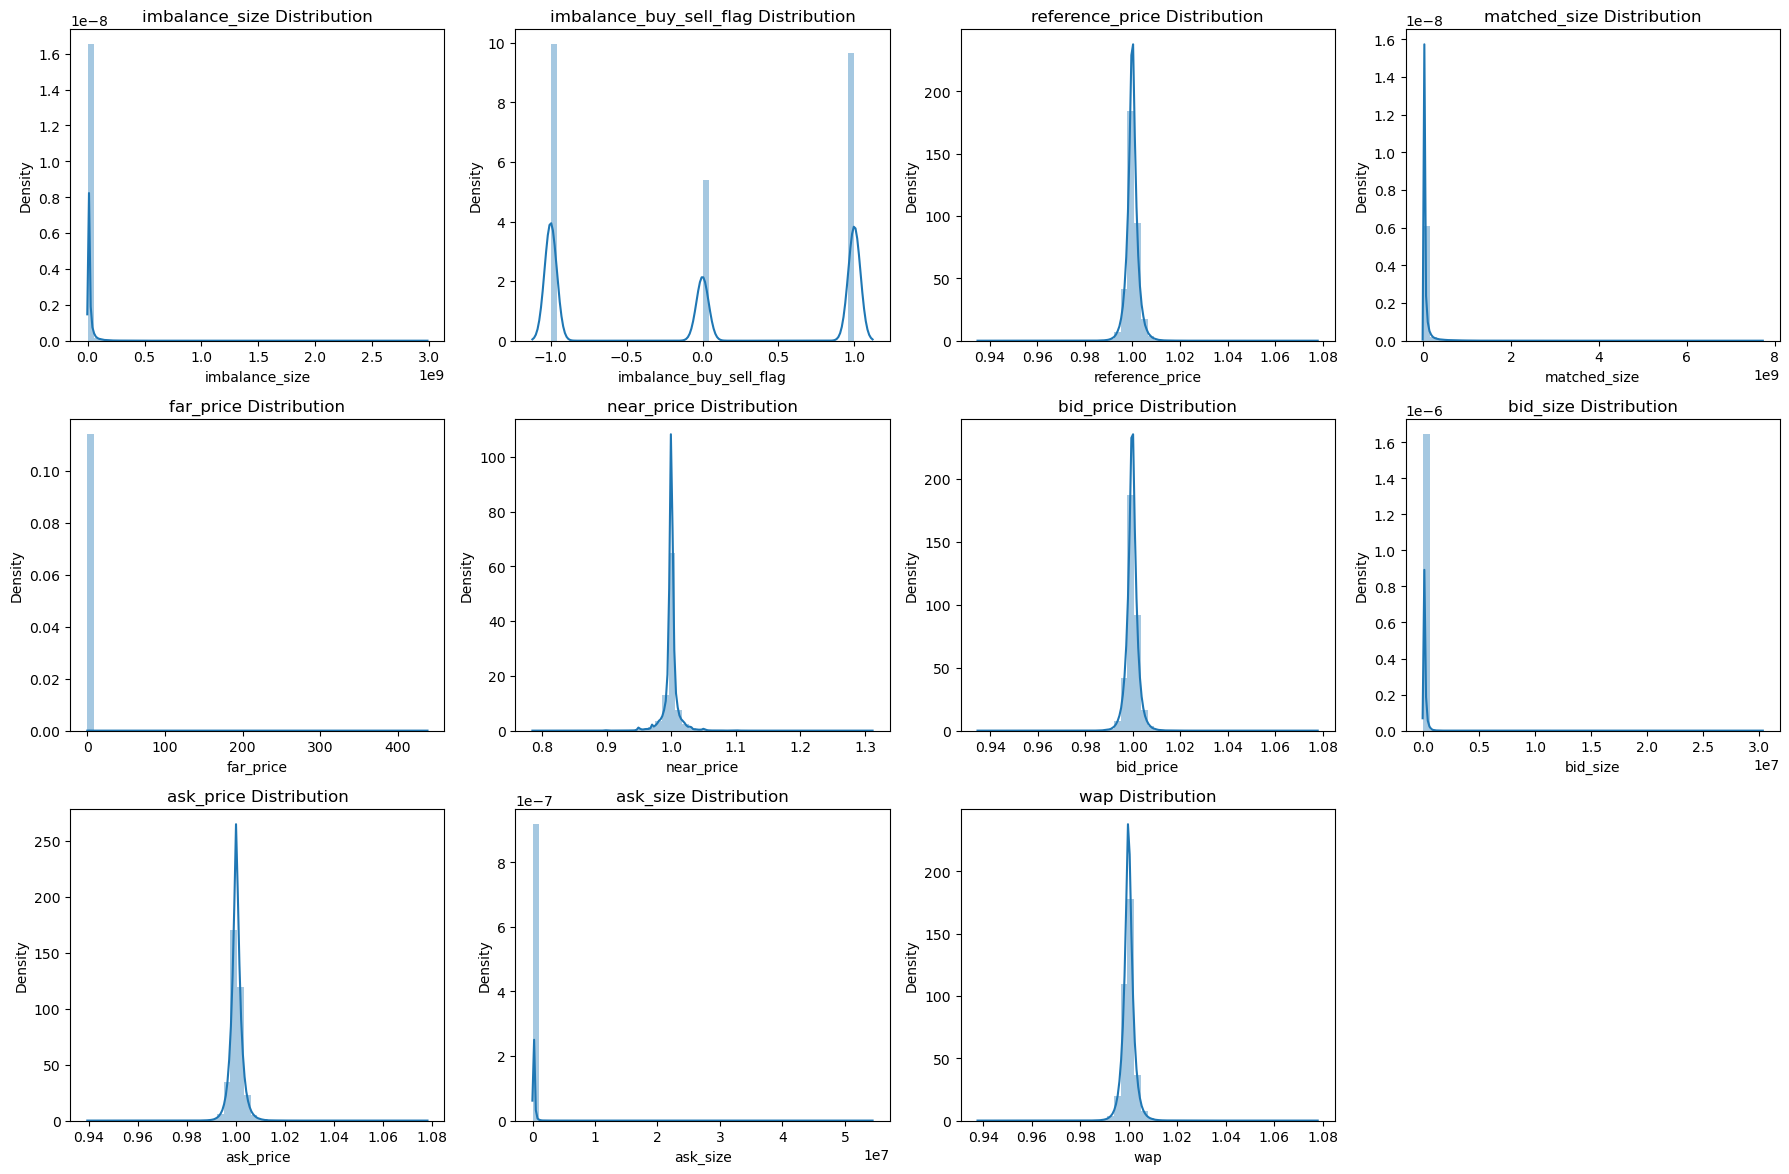

In [5]:
def plot_histograms_kde(df, num_cols, n_cols=4):
    n_rows = (len(num_cols) - 1) // n_cols + 1
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        ax = axes[i]
        sns.distplot(df[col], kde=True, ax=ax)
        ax.set_title(f'{col} Distribution')

    for idx in range(i+1, len(axes)):
        fig.delaxes(axes.flatten()[idx])

    plt.tight_layout()
    plt.show()

num_cols = data.select_dtypes(include=['float64']).columns.tolist()
plot_histograms_kde(data, ['imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price',
       'ask_size', 'wap'])


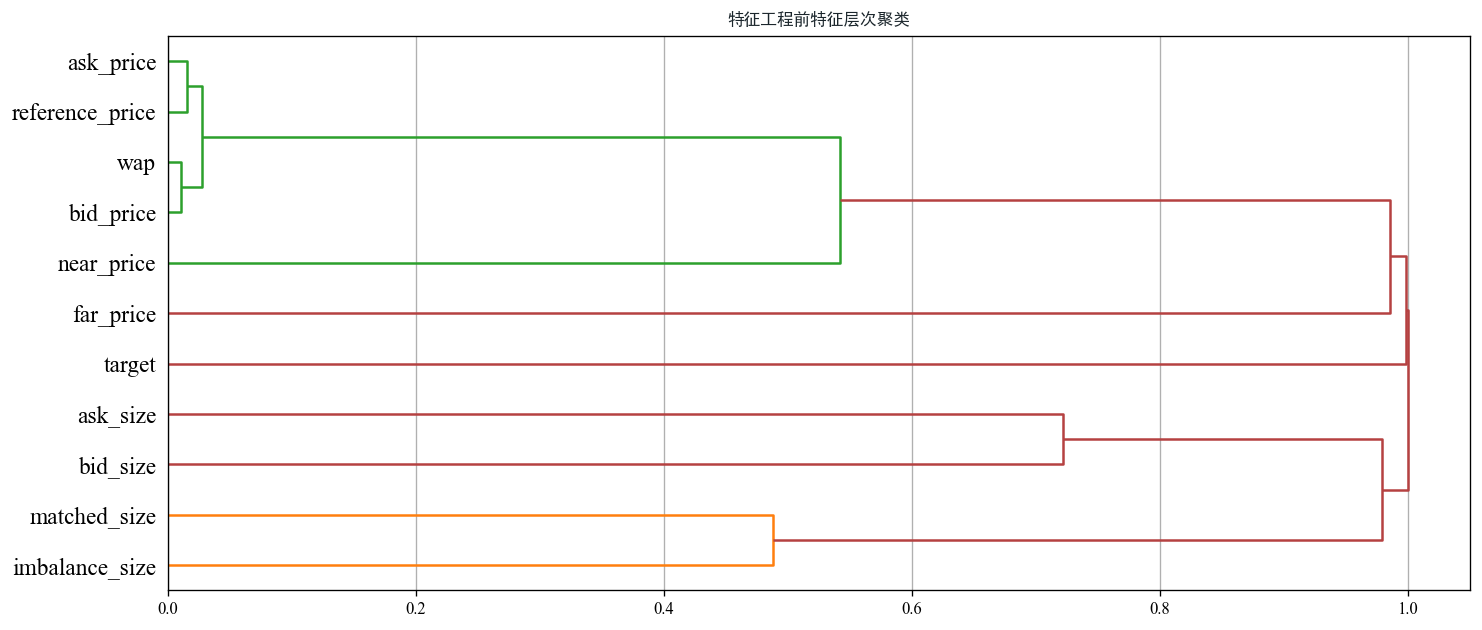

In [25]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
def hierarchical_clustering(data, title):
    fig, ax = plt.subplots(1, 1, figsize=(14, 6), dpi=120)
    correlations = data.corr()
    converted_corr = 1 - np.abs(correlations)
    Z = linkage(squareform(converted_corr), 'complete')

    dn = dendrogram(Z, labels=data.columns, ax=ax, above_threshold_color='#B54141', orientation='right')
    plt.yticks(font='Times New Roman', fontsize=14)
    hierarchy.set_link_color_palette(None)
    plt.grid(axis='x')
    plt.title(f'特征工程前特征层次聚类', fontsize=28, fontweight='bold', color='#1B262C',font='SimHei')
    plt.show()
num_cols = data.select_dtypes(include=['float64']).columns.tolist()
hierarchical_clustering(data[num_cols], title='Train data')

In [26]:
df = pd.read_csv('data/train_gened.csv')